In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


### Import dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the DataSet

In [3]:
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# EDA

In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# Dropping unnecessary columns

df.drop(columns=['url','address','menu_item','dish_liked','reviews_list','phone'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
# Removing duplicate rows

df.drop_duplicates(inplace = True)

### Cleaning rate column

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def handle_rate(value):
    if(value == 'NEW'or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handle_rate)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [12]:
df['rate'].isnull().sum()

10019

In [13]:
df['rate'].mean()

3.700141861024285

In [14]:
# Handling missing values in rate column

df['rate'] = df['rate'].fillna(df['rate'].mean())
df['rate'].isnull().sum()

0

In [15]:
# Dropping rows with missing values

df.dropna(inplace = True)

In [16]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
# Renaming columns

df.rename(columns={'approx_cost(for two people)':'cost_2_plates','listed_in(type)':'type'},inplace = True)

In [18]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [19]:
df.drop(columns = 'listed_in(city)', inplace = True)

In [20]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843])

In [23]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

### Cleaning cost_2_plates column

In [24]:
df['cost_2_plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
def handle_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

df['cost_2_plates'] = df['cost_2_plates'].apply(handle_comma)

In [26]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


### Cleaning rest_type column

In [27]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [28]:
rest_type = df['rest_type'].value_counts()
rest_type

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [29]:
rest_type_lessthan1000 = rest_type[rest_type < 1000]
rest_type_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [30]:
def handle_rest_type(value):
    if value in rest_type_lessthan1000:
        return 'others'
    else:
        return value
    
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

### Cleaning location column

In [31]:
location = df['location'].value_counts()

In [32]:
location_lessthan_300 = location[location < 300 ] 
location_lessthan_300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

In [33]:
def handle_location(value):
    if value in location_lessthan_300:
        return 'others'
    else:
        return value
    
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

### Cleaning cuisines column

In [34]:
df['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [35]:
cuisines = df['cuisines'].value_counts()

In [36]:
cuisines_lessthan_100 = cuisines[cuisines < 100]

In [37]:
def handle_cuisines(value):
    if value in cuisines_lessthan_100:
        return 'others'
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


# Visualising Data for Analysis

## count plot for various location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

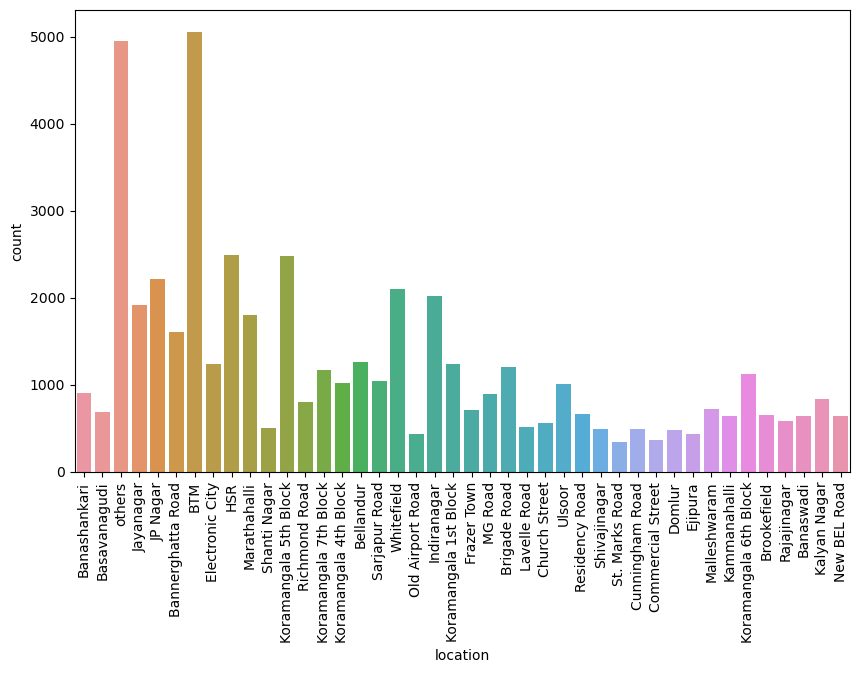

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'location',data = df)
plt.xlabel = 'location'
plt.label = 'count'
plt.title = 'count of location'
plt.xticks(rotation = 90)

## count plot for online orders

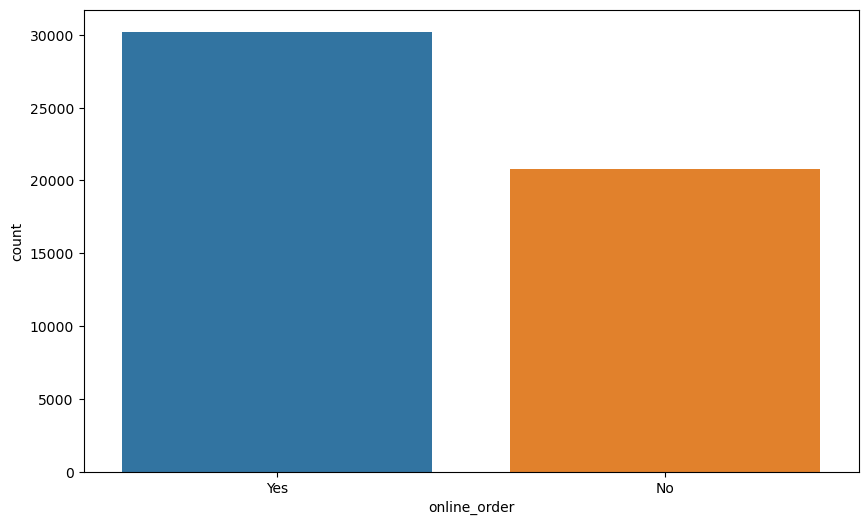

In [40]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'online_order',data = df)
plt.label = 'Online order'
plt.label = 'count'
plt.title = 'count of online orders'

In [41]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


## count plot for book_table

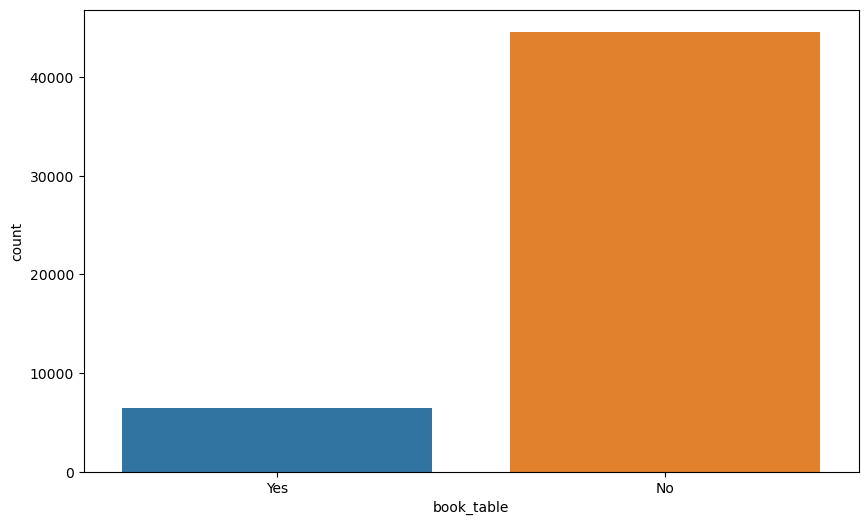

In [42]:
plt.figure(figsize = (10,6))
sns.countplot(x= 'book_table',data = df)
plt.xlabel = 'book table'
plt.ylabel = 'count'
plt.title = 'count of book table'

## Visualizing Online order vs Rate

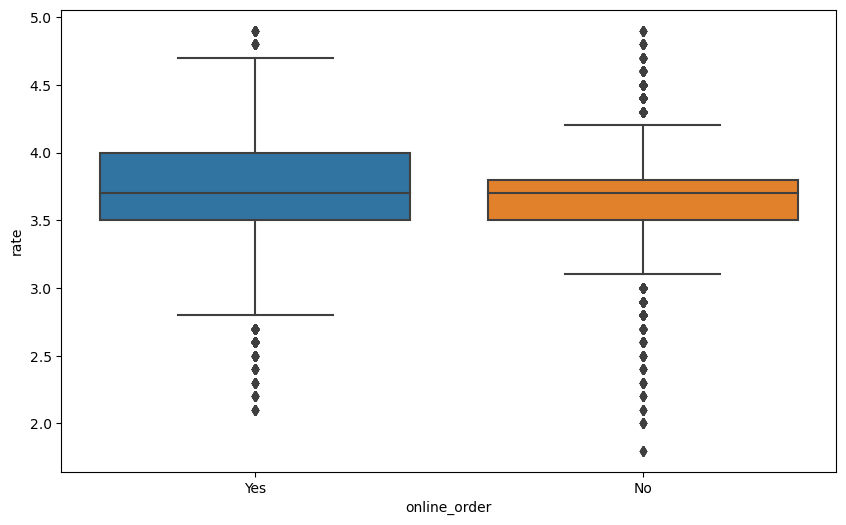

In [43]:
plt.figure(figsize = (10,6))
sns.boxplot(x= 'online_order',y= 'rate', data = df)
plt.xlabel = 'online order'
plt.ylabel = 'rate'
plt.title = 'online_order vs rate'

## Visualizing book_table vs Rate

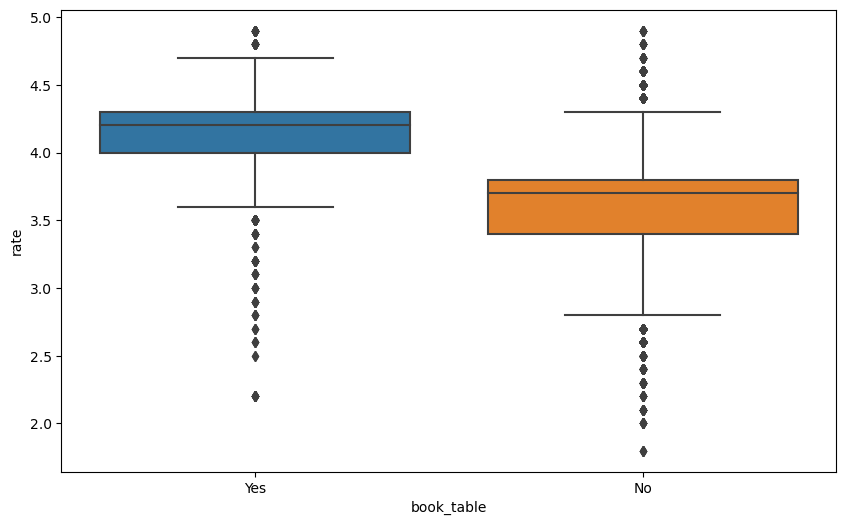

In [44]:
plt.figure(figsize = (10,6))
sns.boxplot(x= 'book_table',y= 'rate', data = df)
plt.xlabel = 'book table'
plt.ylabel = 'rate'
plt.title = 'book table vs rate'

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


## Visualizing online order Facility location wise

In [46]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1 = df1.to_frame()
df1.head()

name
location     online_order      
BTM          No            1763
             Yes           3293
Banashankari No             397
             Yes            505
Banaswadi    No             302

In [47]:
df1 = pd.pivot_table(df1,index = ['location'], columns = ['online_order'])

<AxesSubplot:xlabel='location'>

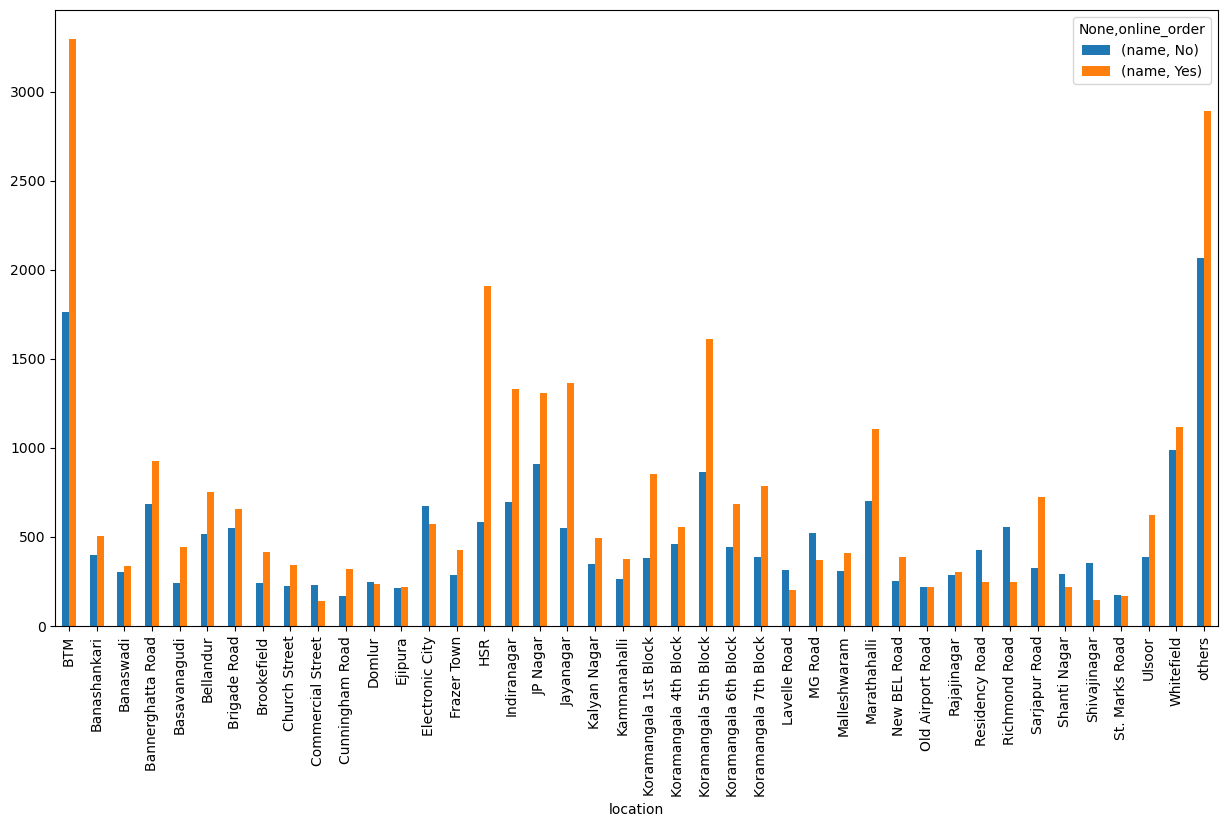

In [48]:
df1.plot(kind = 'bar', figsize = (15,8))

## Visualizing book table facility location wise

In [49]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2 = df2.to_frame()
df2.head()

name
location     book_table      
BTM          No          4889
             Yes          167
Banashankari No           839
             Yes           63
Banaswadi    No           632

In [50]:
df2 = pd.pivot_table(df2,index = 'location',columns = 'book_table')
df2.head()

name       
book_table             No    Yes
location                        
BTM                4889.0  167.0
Banashankari        839.0   63.0
Banaswadi           632.0    8.0
Bannerghatta Road  1510.0   99.0
Basavanagudi        668.0   16.0

<AxesSubplot:xlabel='location'>

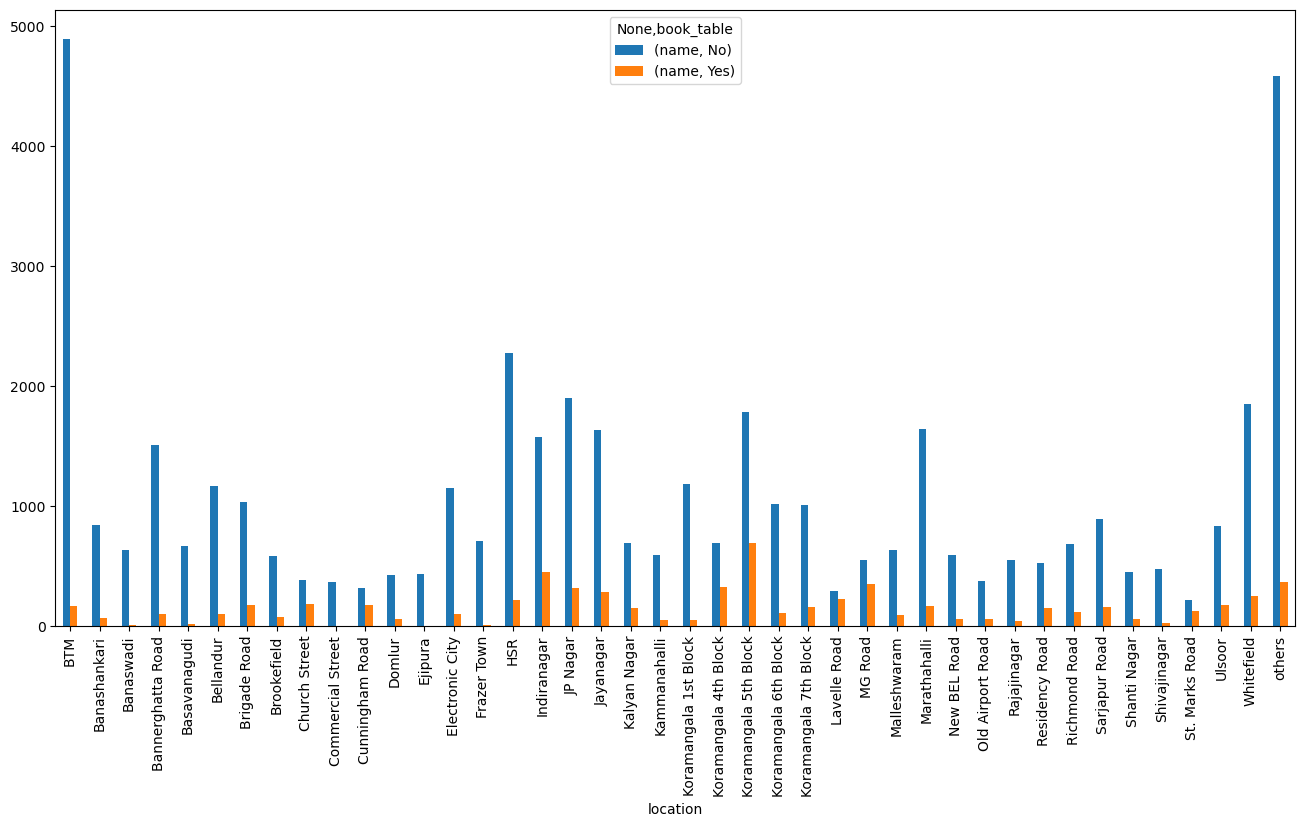

In [51]:
df2.plot(kind = 'bar' ,figsize = (16,8))

In [52]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


## Visualizing type of resturant vs rating

<AxesSubplot:xlabel='type', ylabel='rate'>

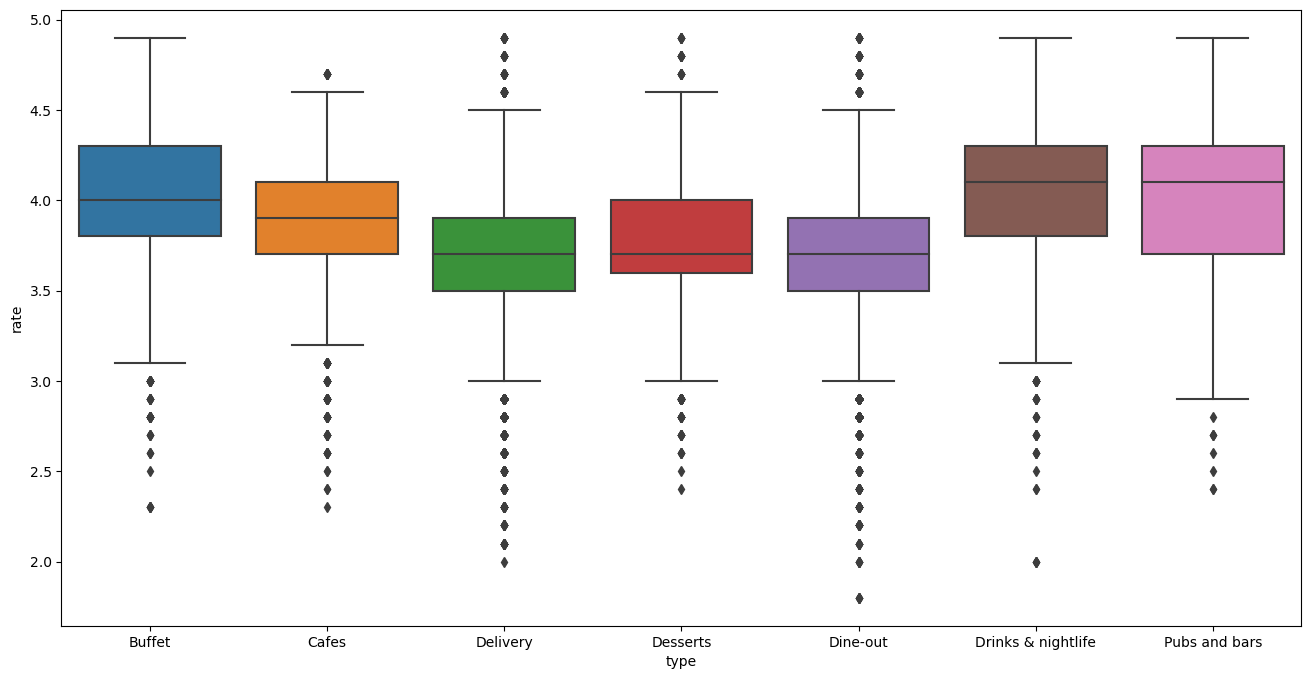

In [53]:
plt.figure(figsize= (16,8))
sns.boxplot(x= 'type',y = 'rate',data = df)

## Visualizing type of resturant location wise

In [54]:
df3 = df.groupby(['location','type'])['name'].count()
df3 = df3.to_frame()
df3.head()

name
location type          
BTM      Buffet      21
         Cafes       83
         Delivery  3053
         Desserts   198
         Dine-out  1660

In [55]:
df3 = pd.pivot_table(df3,index = 'location', columns = 'type')
df3.head()

name                                                      \
type              Buffet Cafes Delivery Desserts Dine-out Drinks & nightlife   
location                                                                       
BTM                 21.0  83.0   3053.0    198.0   1660.0               22.0   
Banashankari         7.0  36.0    418.0     71.0    356.0               14.0   
Banaswadi            NaN  24.0    310.0     37.0    262.0                6.0   
Bannerghatta Road    9.0  46.0    828.0    137.0    578.0                9.0   
Basavanagudi         7.0  11.0    344.0     66.0    251.0                5.0   

                                 
type              Pubs and bars  
location                         
BTM                        19.0  
Banashankari                NaN  
Banaswadi                   1.0  
Bannerghatta Road           2.0  
Basavanagudi                NaN

<AxesSubplot:xlabel='location'>

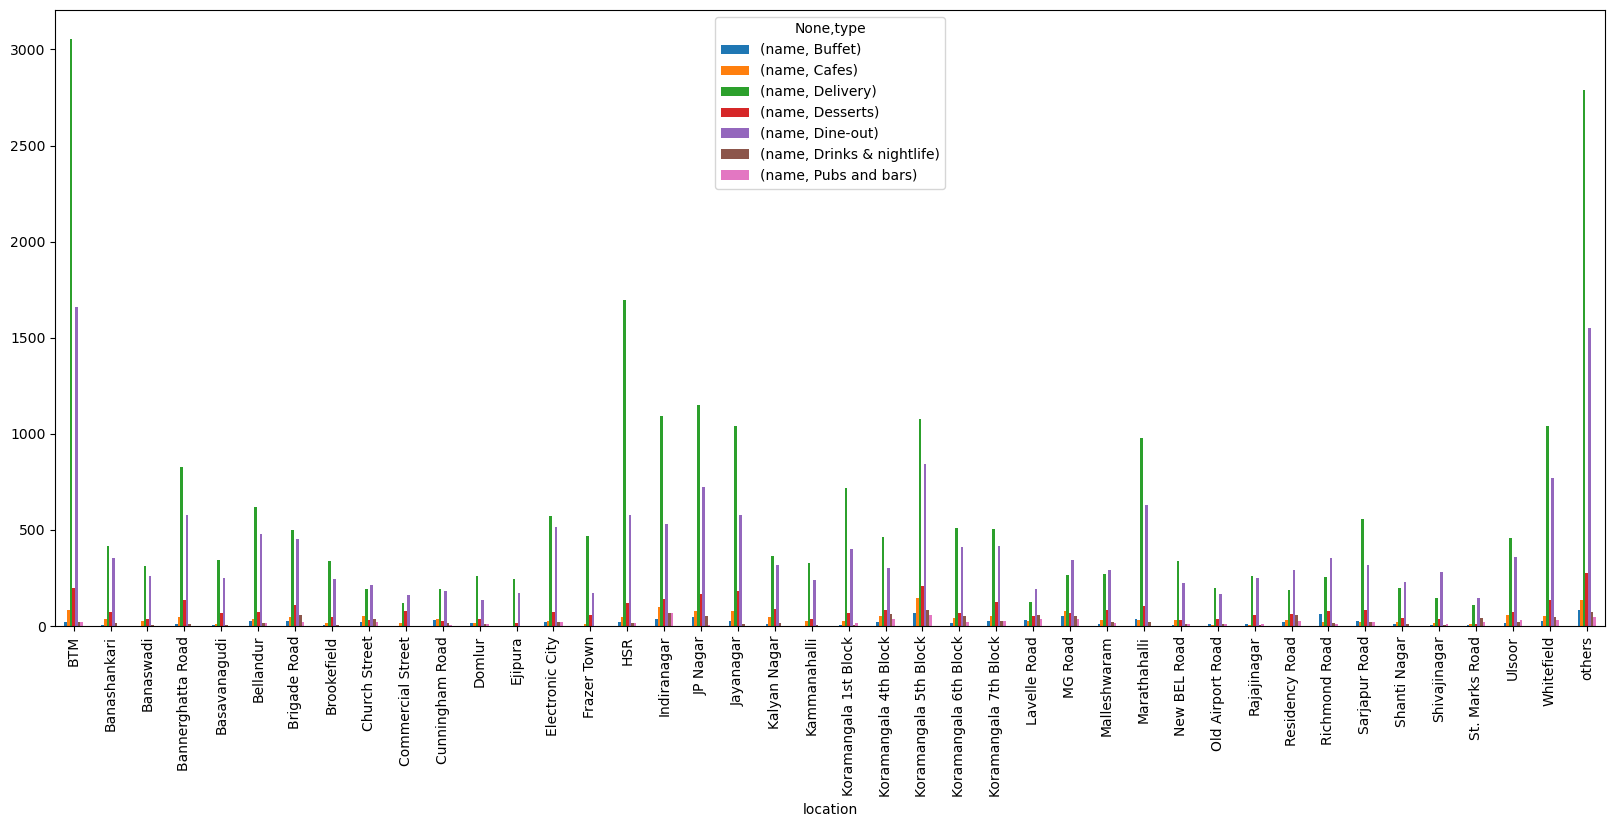

In [56]:
df3.plot(kind = 'bar' ,figsize = (20,8))

In [57]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_2_plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


## NO. of votes Location wise

In [58]:
df4 = df[['location','votes']]
df4 = df4.drop_duplicates()
df4.head()

,location,votes
0,Banashankari,775
1,Banashankari,787
2,Banashankari,918
3,Banashankari,88
4,Basavanagudi,166


In [59]:
df5 = df4.groupby(['location'])['votes'].sum()
df5.head()

location
BTM                  205862
Banashankari          58709
Banaswadi             14983
Bannerghatta Road    100907
Basavanagudi          41703
Name: votes, dtype: int64

<AxesSubplot:xlabel='location'>

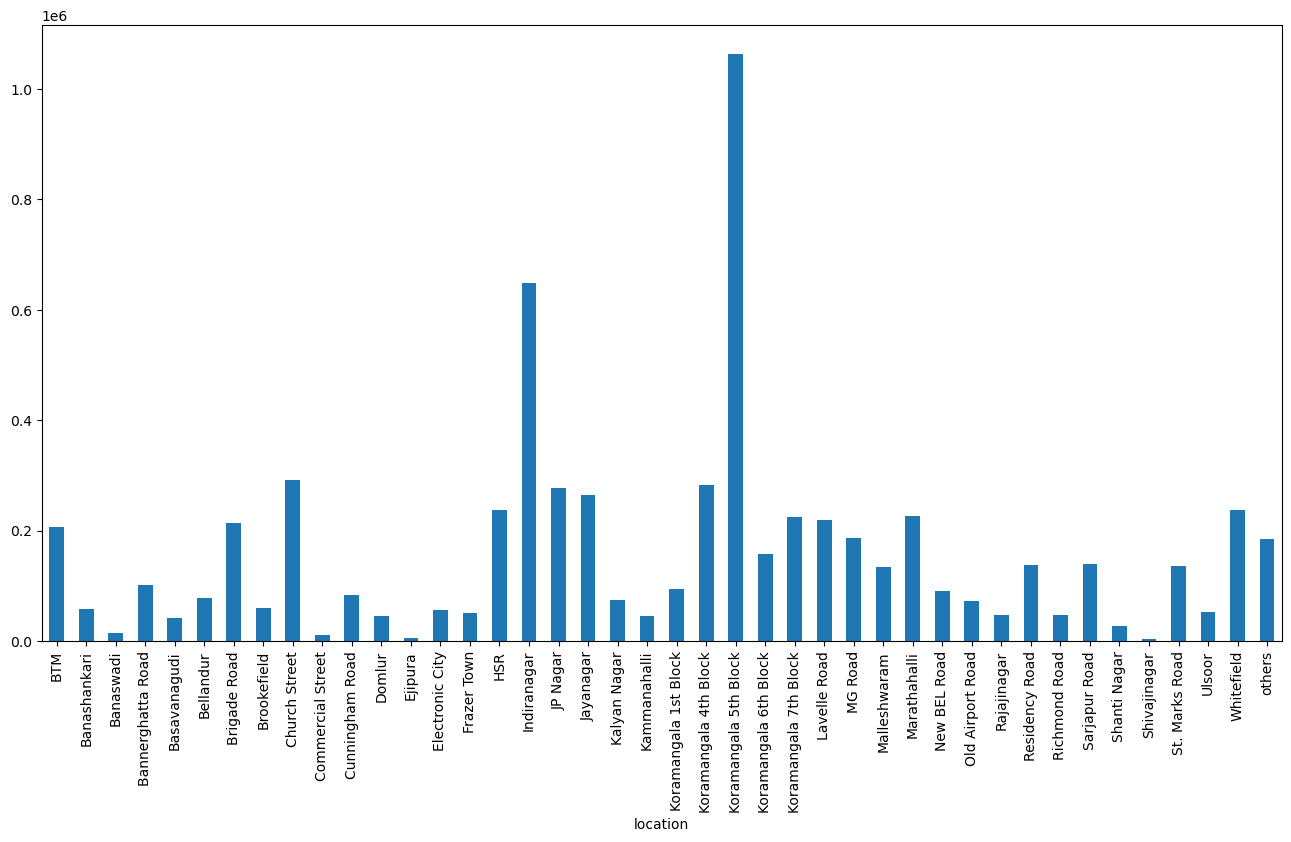

In [60]:
df5.plot(kind = 'bar',figsize = (16,8))

In [61]:
'''Location is an important factor: The votes indicate that certain areas are more popular than others for dining out. Areas like Indiranagar, Koramangala 5th Block, Brigade Road, and HSR have 
the highest number of votes, suggesting that opening a restaurant in these areas could attract more customers.

Competition is high in popular areas: On the other hand, opening a restaurant in popular areas could mean facing stiff competition from existing restaurants. For example, Brigade Road and 
Indiranagar have a high number of votes, but also a high number of restaurants. Therefore, it's important to have a unique selling point or a niche to stand out.

Consider emerging areas: While some areas have a high number of votes, emerging areas like Bellandur, Marathahalli, and Whitefield also have a substantial number of votes. This suggests 
that there may be a growing customer base in these areas that could be tapped into.

Certain cuisines may be more popular in certain areas: It's possible that certain cuisines may be more popular in certain areas. For example, Banashankari and Basavanagudi may be more 
receptive to traditional South Indian cuisine, while Koramangala 5th Block may be more open to international cuisines.'''

"Location is an important factor: The votes indicate that certain areas are more popular than others for dining out. Areas like Indiranagar, Koramangala 5th Block, Brigade Road, and HSR have \nthe highest number of votes, suggesting that opening a restaurant in these areas could attract more customers.\n\nCompetition is high in popular areas: On the other hand, opening a restaurant in popular areas could mean facing stiff competition from existing restaurants. For example, Brigade Road and \nIndiranagar have a high number of votes, but also a high number of restaurants. Therefore, it's important to have a unique selling point or a niche to stand out.\n\nConsider emerging areas: While some areas have a high number of votes, emerging areas like Bellandur, Marathahalli, and Whitefield also have a substantial number of votes. This suggests \nthat there may be a growing customer base in these areas that could be tapped into.\n\nCertain cuisines may be more popular in certain areas: It's pos

## Visualizing Top Cuisines

In [62]:
df6 = df[['cuisines','votes']]
df6 = df6.drop_duplicates()

In [63]:
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values(by = 'votes',ascending = False)
df7 = df7.iloc[1: ,:]
df7.head()

,votes
cuisines,
North Indian,242761
South Indian,87286
"North Indian, Chinese",82290
"North Indian, Mughlai",65813
Chinese,40613


<AxesSubplot:xlabel='cuisines'>

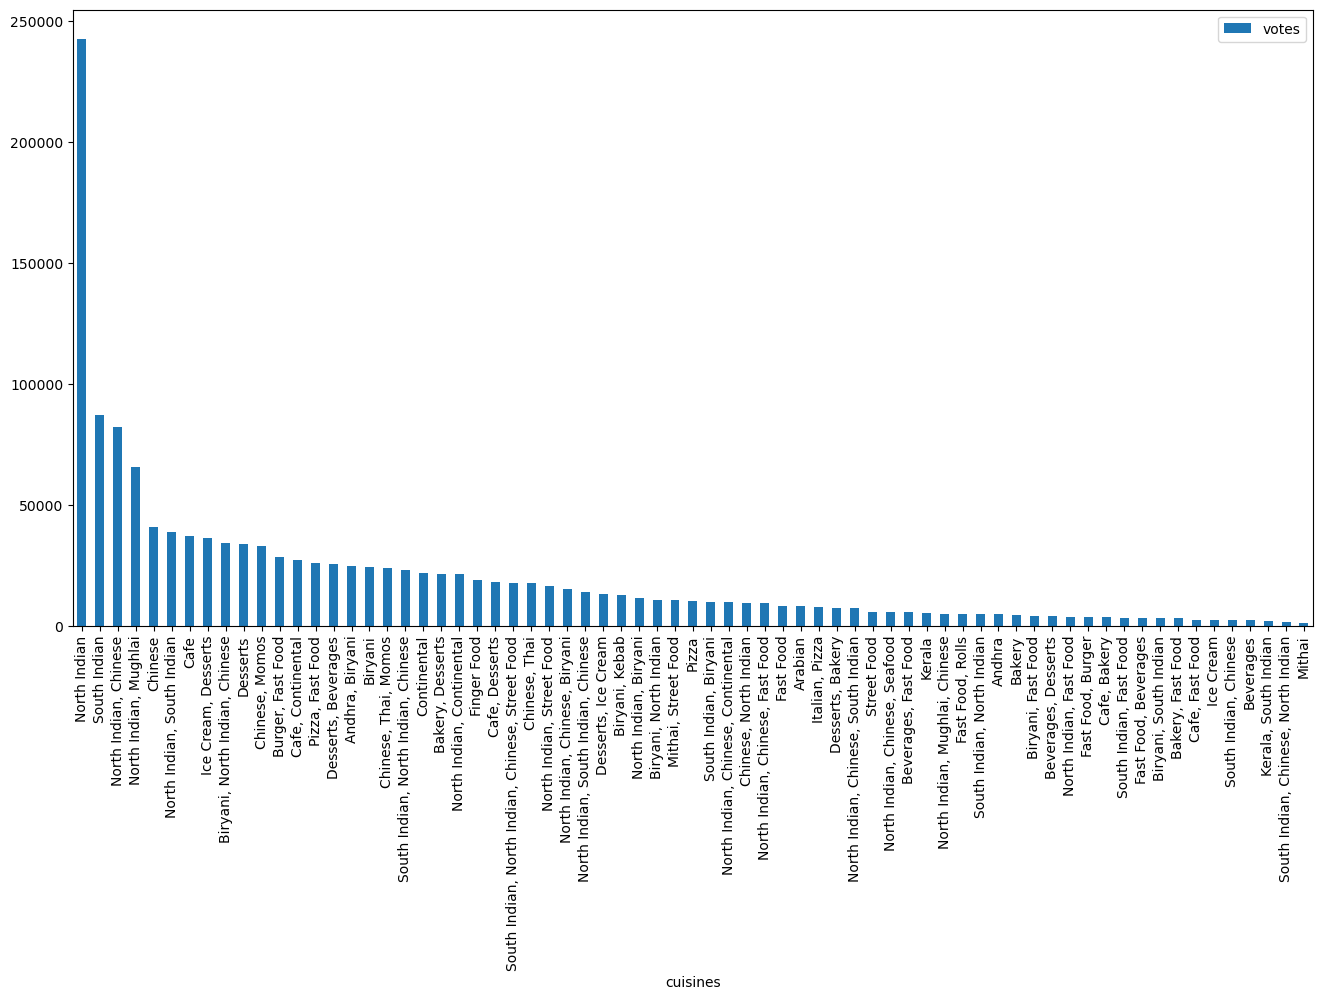

In [64]:
df7.plot(kind = 'bar', figsize = (16,8))

In [65]:
'''Cuisine: North Indian cuisine seems to be the most popular with the highest number of votes. South Indian and Chinese cuisines are also popular.
A restaurant serving North Indian cuisine might have higher chances of success.
However, it is important to note that there is already a high number of restaurants serving North Indian cuisine, which might result in high competition.

Cuisine Combination: North Indian cuisine combined with Chinese or Mughlai cuisine seem to be popular. A restaurant that serves a combination of popular cuisines
might have an advantage in attracting customers.

Other cuisines: Although not as popular as North Indian cuisine, other cuisines such as Continental, Italian, and Mexican also have a significant number of votes.
A restaurant serving these cuisines might be able to cater to a niche customer base.'''

'Cuisine: North Indian cuisine seems to be the most popular with the highest number of votes. South Indian and Chinese cuisines are also popular.\nA restaurant serving North Indian cuisine might have higher chances of success.\nHowever, it is important to note that there is already a high number of restaurants serving North Indian cuisine, which might result in high competition.\n\nCuisine Combination: North Indian cuisine combined with Chinese or Mughlai cuisine seem to be popular. A restaurant that serves a combination of popular cuisines\nmight have an advantage in attracting customers.\n\nOther cuisines: Although not as popular as North Indian cuisine, other cuisines such as Continental, Italian, and Mexican also have a significant number of votes.\nA restaurant serving these cuisines might be able to cater to a niche customer base.'